## Data and packages loading

In [1]:
# Import all required packages

import pandas as pd 
import numpy as np 
import math 
import matplotlib.pylab as plt 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Read the data files
train_df = pd.read_csv("loan_sanction_train.csv")
test_df = pd.read_csv("loan_sanction_test.csv")

## Data transformation and cleaning

In [3]:
# Review the characteristics of the dataset
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
# Vizualize if there is any missing values
pd.DataFrame({'length' : len(train_df),'miss.val': train_df.isnull().sum(),})

,length,miss.val
Loan_ID,614,0
Gender,614,13
Married,614,3
Dependents,614,15
Education,614,0
Self_Employed,614,32
ApplicantIncome,614,0
CoapplicantIncome,614,0
LoanAmount,614,22
Loan_Amount_Term,614,14


In [6]:
# Delete rows with null values
train_df.dropna(inplace=True)
pd.DataFrame({'length' : len(train_df),'miss.val': train_df.isnull().sum(),})

,length,miss.val
Loan_ID,480,0
Gender,480,0
Married,480,0
Dependents,480,0
Education,480,0
Self_Employed,480,0
ApplicantIncome,480,0
CoapplicantIncome,480,0
LoanAmount,480,0
Loan_Amount_Term,480,0


In [7]:
pd.DataFrame({'length' : len(train_df),'miss.val': test_df.isnull().sum(),})

,length,miss.val
Loan_ID,480,0
Gender,480,11
Married,480,0
Dependents,480,10
Education,480,0
Self_Employed,480,23
ApplicantIncome,480,0
CoapplicantIncome,480,0
LoanAmount,480,5
Loan_Amount_Term,480,6


In [8]:
test_df.dropna(inplace=True)
pd.DataFrame({'length' : len(train_df),'miss.val': test_df.isnull().sum(),})

,length,miss.val
Loan_ID,480,0
Gender,480,0
Married,480,0
Dependents,480,0
Education,480,0
Self_Employed,480,0
ApplicantIncome,480,0
CoapplicantIncome,480,0
LoanAmount,480,0
Loan_Amount_Term,480,0


## Data visualization

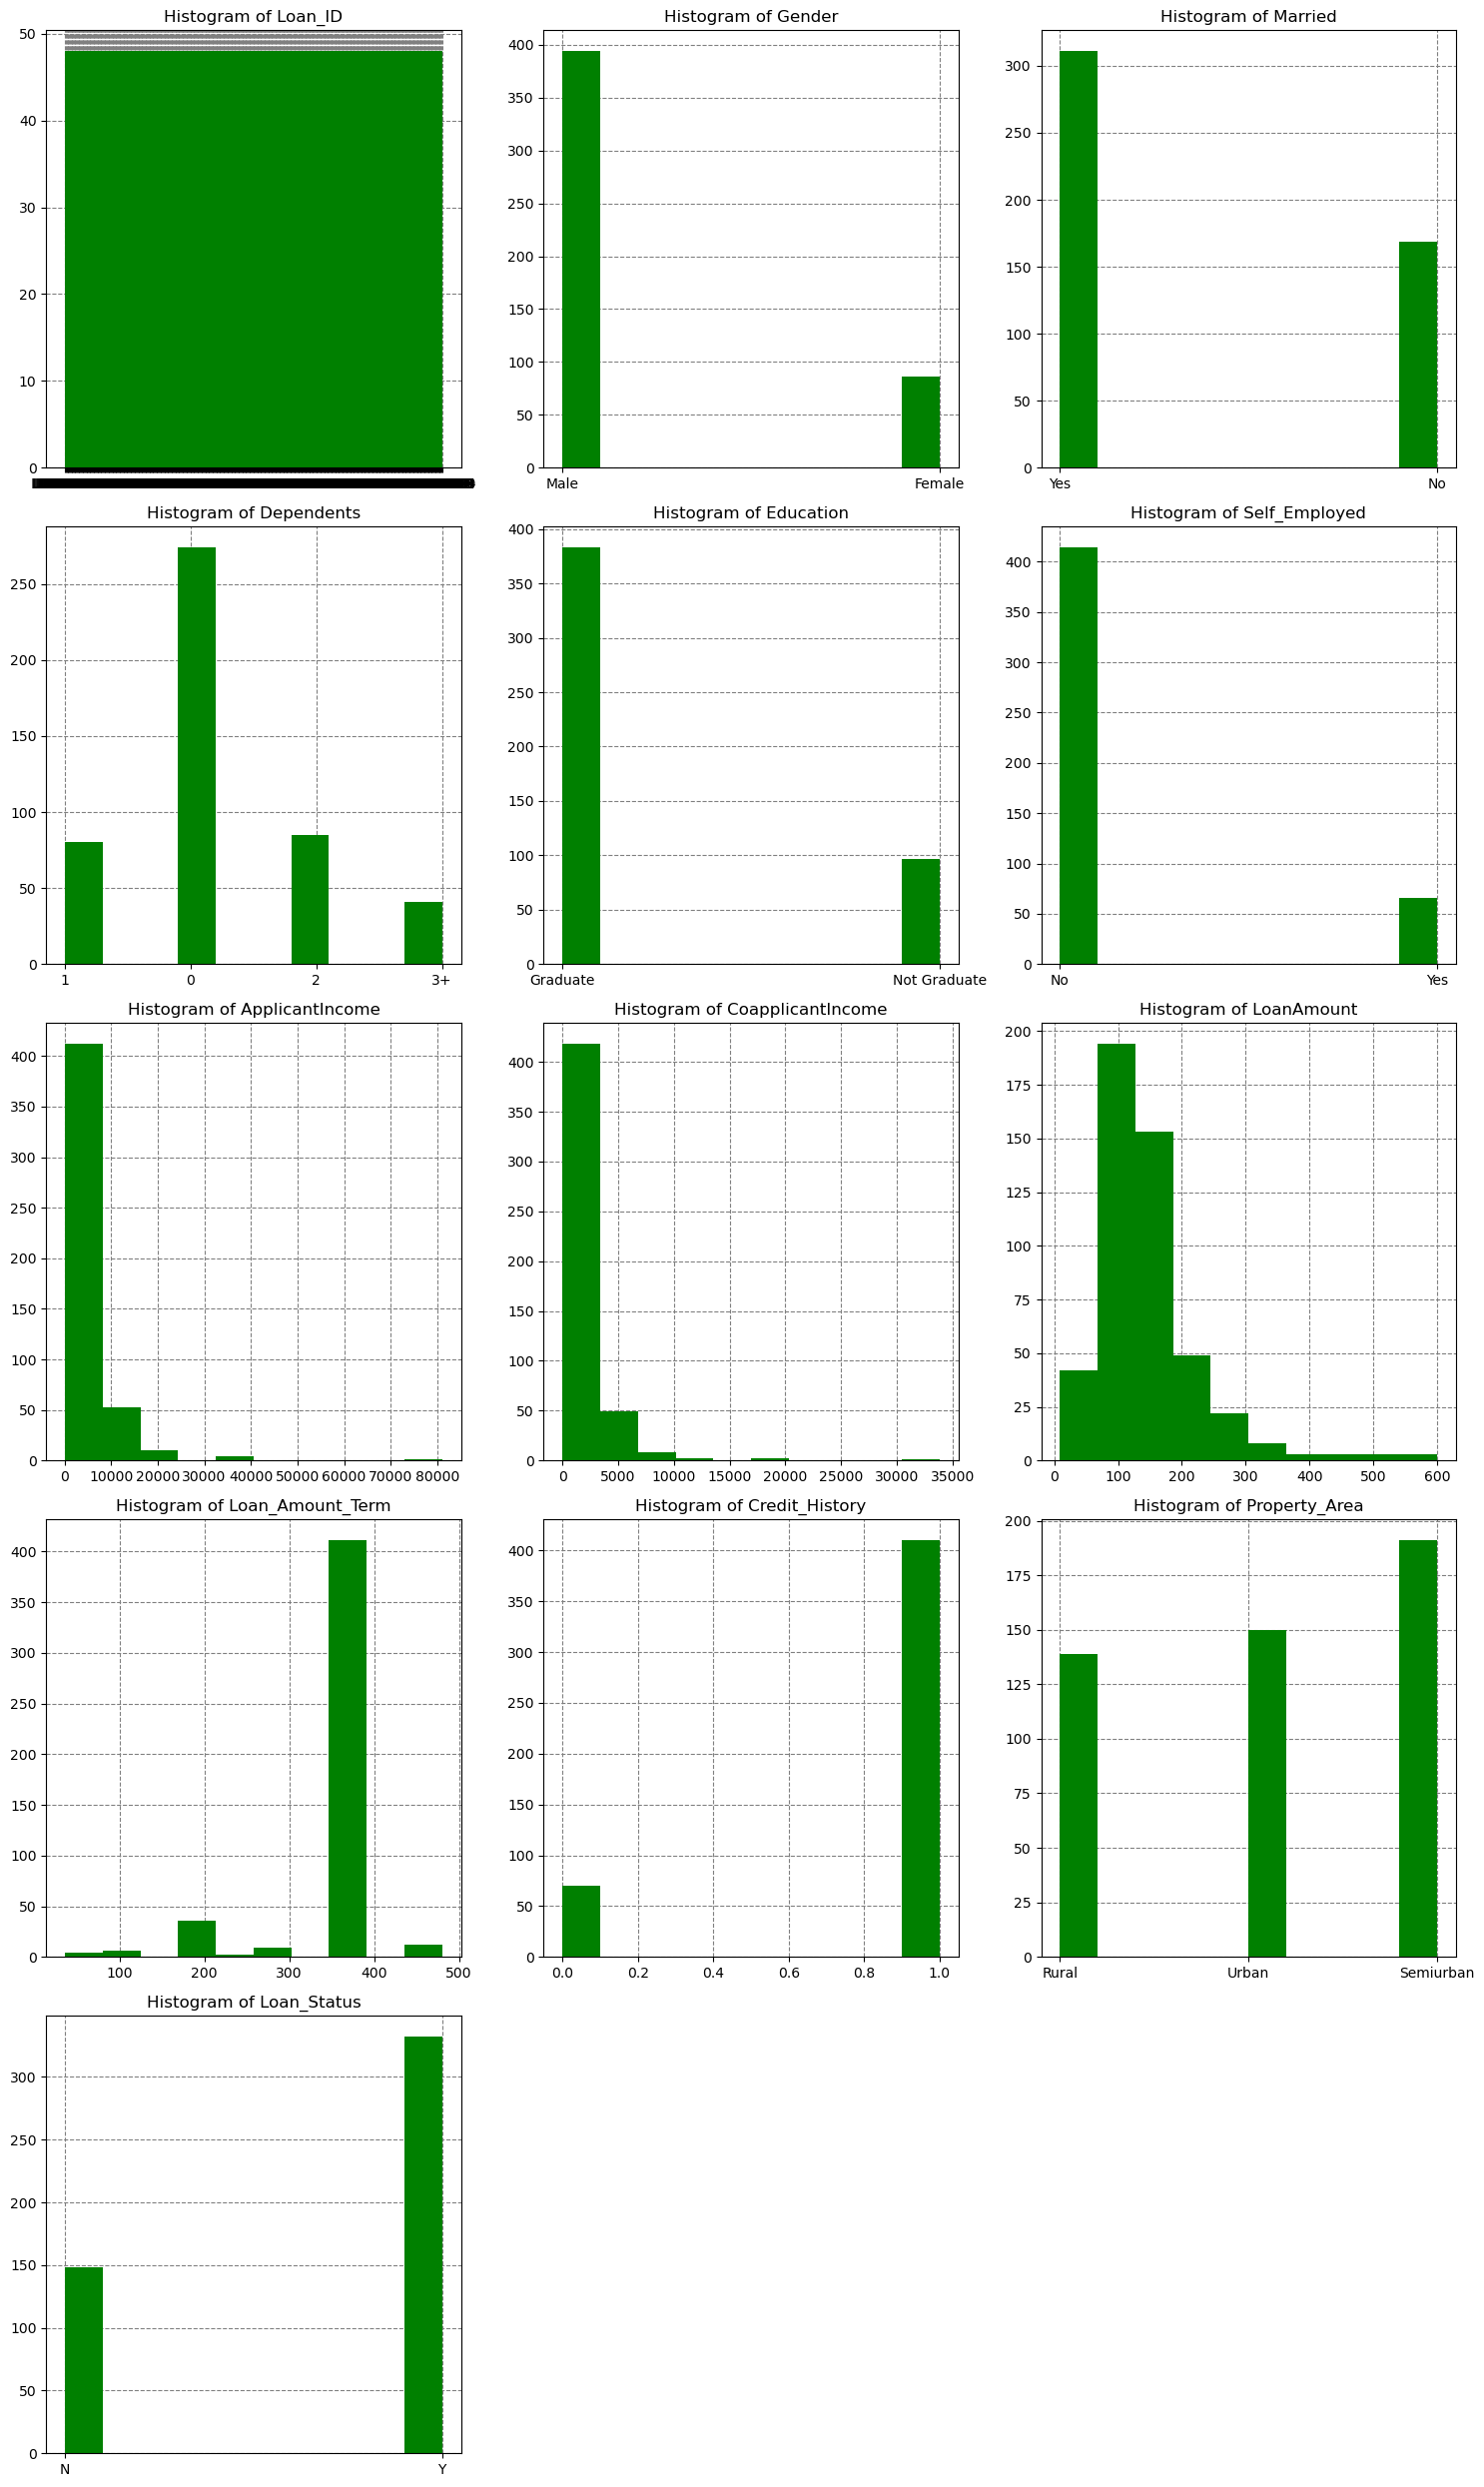

In [9]:
# Histogram to overview the data

# Train data
num_columns = 3
num_rows = math.ceil(len(train_df.columns) / num_columns)

fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 5*num_rows))

axes = axes.flatten() if num_rows > 1 else [axes]

for i, column in enumerate(train_df.columns):
    ax = axes[i]
    ax.hist(train_df[column], color='green')  # Set histogram color to orange
    ax.set_axisbelow(True)
    ax.grid(which='major', color='grey', linestyle='--')
    ax.set_title(f'Histogram of {column}')

for i in range(len(train_df.columns), num_rows*num_columns):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

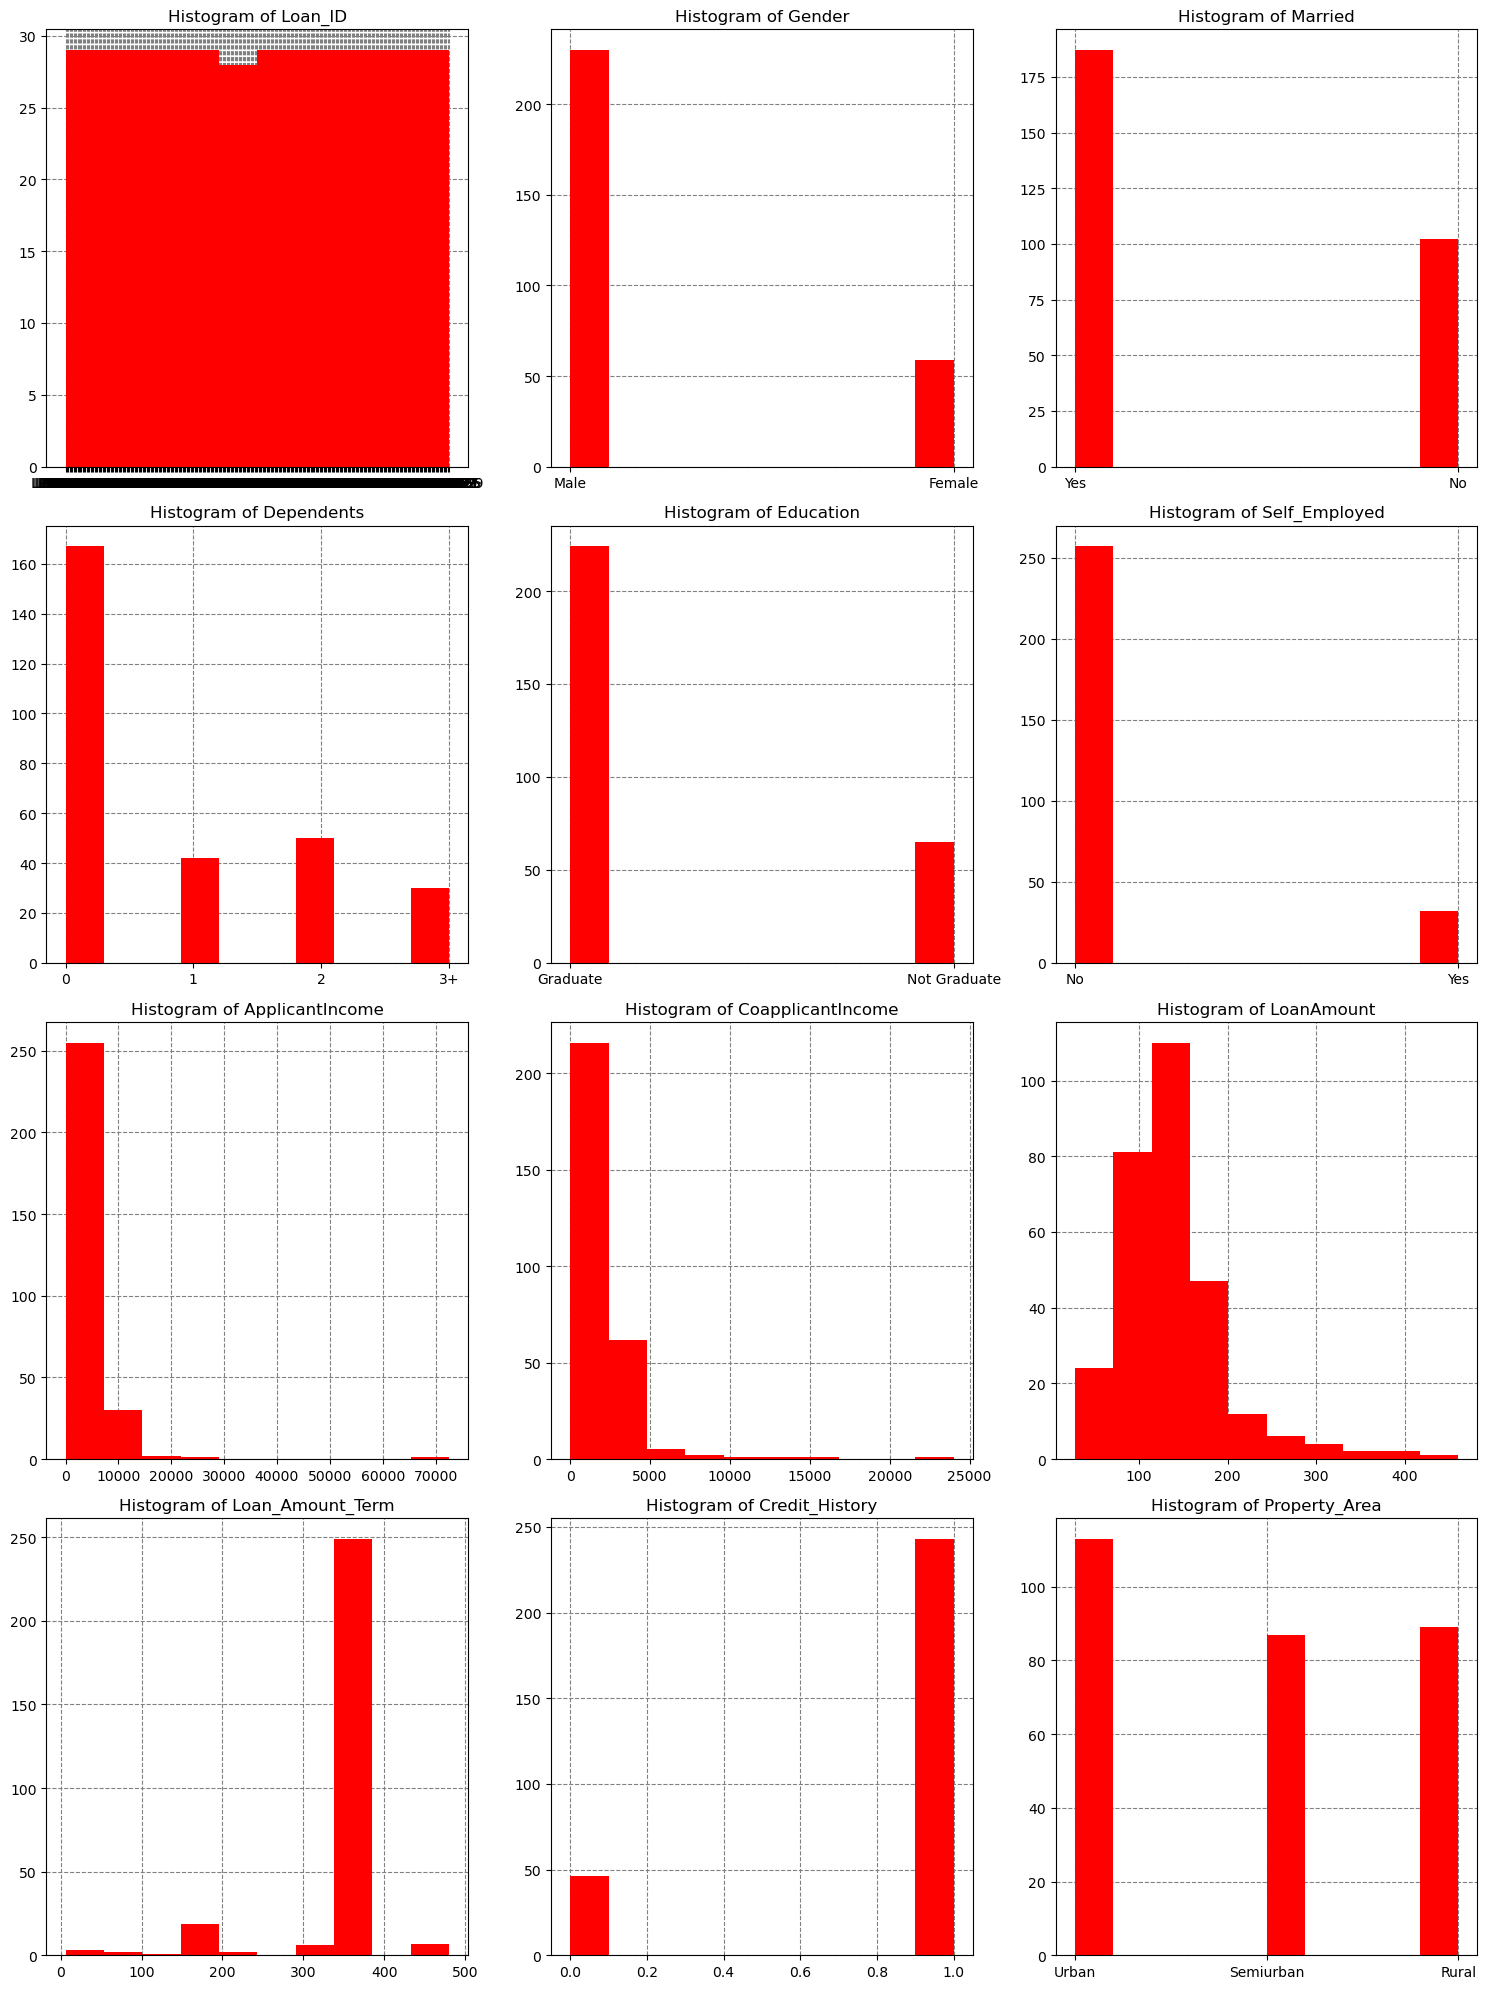

In [10]:
# Test data
num_columns = 3
num_rows = math.ceil(len(test_df.columns) / num_columns)

fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 5*num_rows))

axes = axes.flatten() if num_rows > 1 else [axes]

for i, column in enumerate(test_df.columns):
    ax = axes[i]
    ax.hist(test_df[column], color='red')
    ax.set_axisbelow(True)
    ax.grid(which='major', color='grey', linestyle='--')
    ax.set_title(f'Histogram of {column}')

for i in range(len(test_df.columns), num_rows*num_columns):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

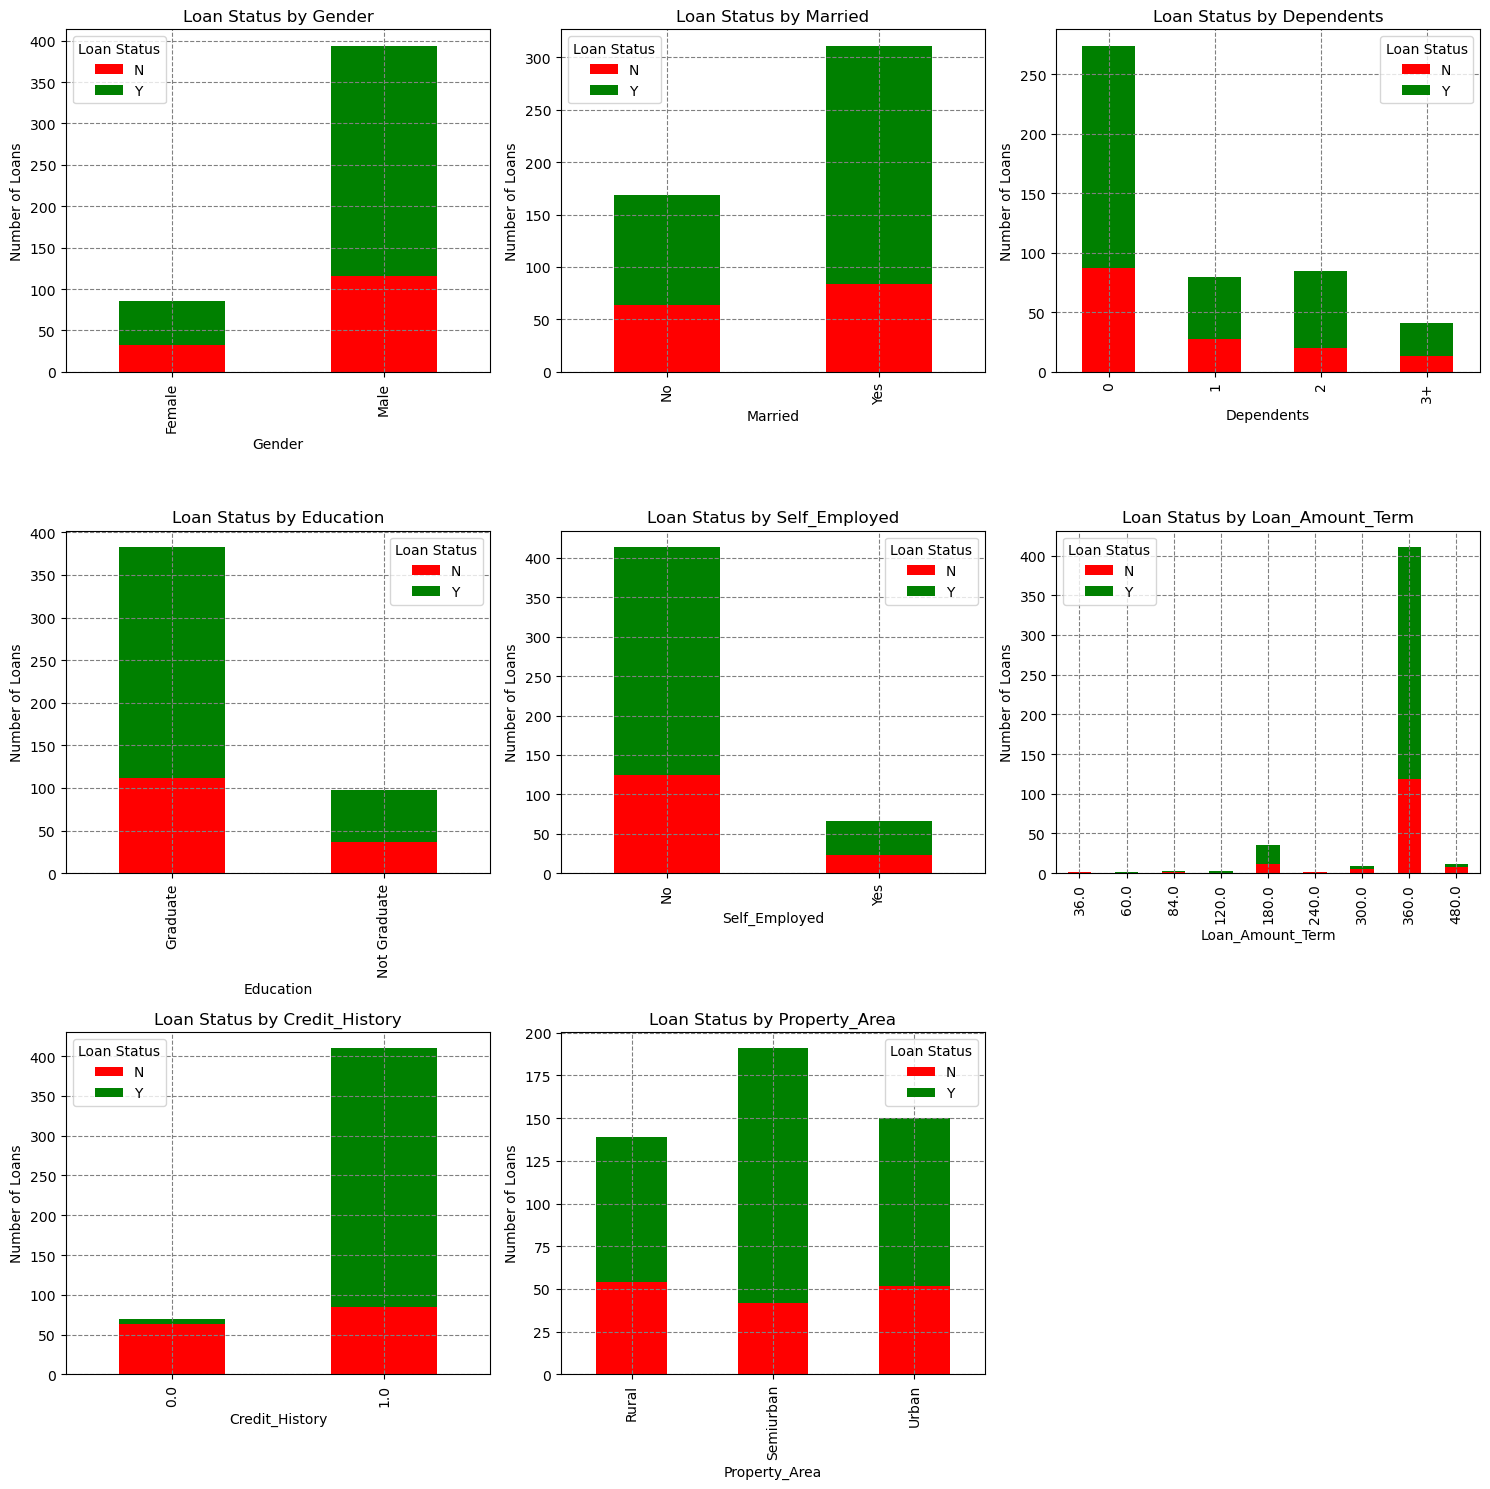

In [11]:
# Exclude columns that are not relevant in the analysis
relevant_columns = [col for col in train_df.columns if col not in ['Loan_ID', 'ApplicantIncome', 'CoapplicantIncome', 'Loan_Status', 'LoanAmount']]

# Determine grid layout
num_columns = 3
num_rows = math.ceil(len(relevant_columns) / num_columns)

# Create subplots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 5*num_rows))
axes = axes.flatten()

# Plot stacked bar charts for each relevant column
for i, column in enumerate(relevant_columns):
    ax = axes[i]
    # Counting the number of loan approvals and rejections for each category in the column
    status_counts = train_df.groupby([column, 'Loan_Status']).size().unstack(fill_value=0)
    # Plotting the stacked bar chart
    status_counts.plot(kind='bar', stacked=True, ax=ax, color=['red', 'green'])
    ax.set_title(f'Loan Status by {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Number of Loans')
    ax.legend(title='Loan Status')
    ax.grid(which='major', color='grey', linestyle='--')

# Remove any unused subplots
for i in range(len(relevant_columns), num_rows*num_columns):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

## Machine Learning Models

### Logistic Regression

In [12]:
# Make a copy for the analysis
lrtrain_df = train_df.copy()

In [13]:
# Convert categorical variables into numerical form
label_encoders = {}
for column in ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Property_Area', 'Self_Employed']:
    label_encoders[column] = LabelEncoder()
    lrtrain_df[column] = label_encoders[column].fit_transform(lrtrain_df[column])

In [14]:
# Assign features from your pre-split training and testing datasets
lr_X = lrtrain_df.drop(columns=['Loan_ID','Loan_Status'])
lr_y = lrtrain_df['Loan_Status']

# Split the dataset into training and testing sets
lr_X_train, lr_X_test, lr_y_train, lr_y_test = train_test_split(lr_X, lr_y, test_size=0.2, random_state=10)
print(lr_X_train.shape, lr_X_test.shape)

(384, 11) (96, 11)


In [15]:
# Initialize the model
log_reg_model = LogisticRegression()

# Fit the model to the training data
log_reg_model.fit(lr_X_train, lr_y_train)

LogisticRegression()

In [16]:
# Make predictions
lr_y_pred = log_reg_model.predict(lr_X_test)

<Figure size 800x600 with 0 Axes>

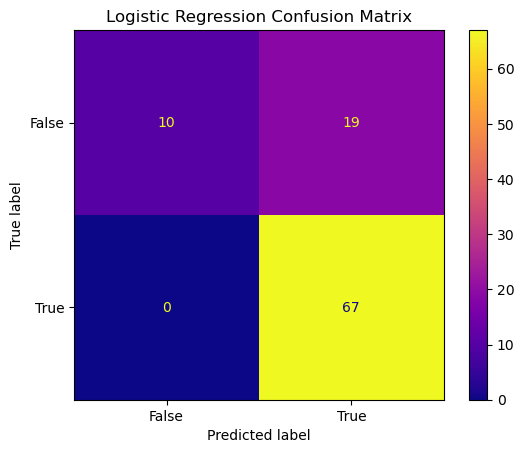

In [17]:
# Confusion Matrix
confusion_matrix = metrics.confusion_matrix(lr_y_test, lr_y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[False, True])

# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm_display.plot(cmap=plt.cm.plasma)
plt.title('Logistic Regression Confusion Matrix')
plt.show()

In [18]:
# Evaluate the model
lr_accuracy = accuracy_score(lr_y_test, lr_y_pred)
class_report = classification_report(lr_y_test, lr_y_pred)

print("Accuracy:", lr_accuracy)
print("Classification Report:\n", class_report)

Accuracy: 0.8020833333333334
Classification Report:
               precision    recall  f1-score   support

           N       1.00      0.34      0.51        29
           Y       0.78      1.00      0.88        67

    accuracy                           0.80        96
   macro avg       0.89      0.67      0.69        96
weighted avg       0.85      0.80      0.77        96



### Multinomial Naive Bayes

In [19]:
# Make a copy for the analysis
nbtrain_df = train_df.copy()

In [20]:
# Convert categorical variables into numerical form
label_encoders = {}
for column in ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Property_Area', 'Self_Employed']:
    label_encoders[column] = LabelEncoder()
    nbtrain_df[column] = label_encoders[column].fit_transform(nbtrain_df[column])

In [21]:
# Assign features from your pre-split training and testing datasets
nb_X = nbtrain_df.drop(columns=['Loan_ID','Loan_Status'])
nb_y = nbtrain_df['Loan_Status']

# Split the dataset into training and testing sets
nb_X_train, nb_X_test, nb_y_train, nb_y_test = train_test_split(nb_X, nb_y, test_size=0.2, random_state=10)
print(nb_X_train.shape, nb_X_test.shape)

(384, 11) (96, 11)


In [22]:
# Calculate Naive Bayes Classifier
nb_model = MultinomialNB(alpha=0.01)
nb_model.fit(nb_X_train, nb_y_train) 

MultinomialNB(alpha=0.01)

In [23]:
# Make predictions
nb_y_pred = nb_model.predict(nb_X_test)

<Figure size 800x600 with 0 Axes>

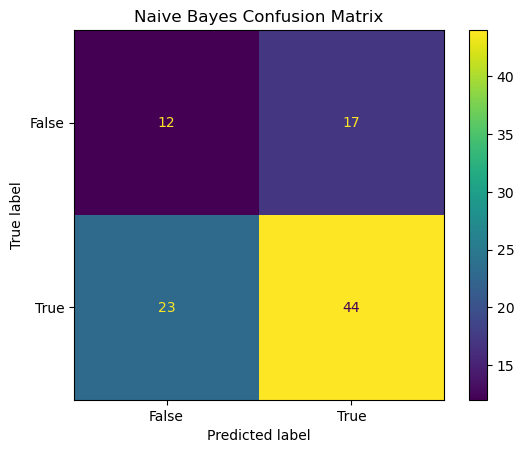

In [24]:
# Confusion Matrix
confusion_matrix = metrics.confusion_matrix(nb_y_test, nb_y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[False, True])

# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm_display.plot(cmap=plt.cm.viridis)
plt.title('Naive Bayes Confusion Matrix')
plt.show()

In [25]:
# Evaluate the model
nb_accuracy = accuracy_score(nb_y_test, nb_y_pred)
class_report = classification_report(nb_y_test, nb_y_pred)

print("Accuracy:", nb_accuracy)
print("Classification Report:\n", class_report)

Accuracy: 0.5833333333333334
Classification Report:
               precision    recall  f1-score   support

           N       0.34      0.41      0.38        29
           Y       0.72      0.66      0.69        67

    accuracy                           0.58        96
   macro avg       0.53      0.54      0.53        96
weighted avg       0.61      0.58      0.59        96



### CART Model

In [26]:
# Make a copy for the analysis
cmtrain_df = train_df.copy()

In [27]:
# Convert categorical variables into numerical form
label_encoders = {}
for column in ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Property_Area', 'Self_Employed']:
    label_encoders[column] = LabelEncoder()
    cmtrain_df[column] = label_encoders[column].fit_transform(cmtrain_df[column])

In [28]:
# Assign features from your pre-split training and testing datasets
cm_X = cmtrain_df.drop(columns=['Loan_ID','Loan_Status'])
cm_y = cmtrain_df['Loan_Status']

# Split the dataset into training and testing sets
cm_X_train, cm_X_test, cm_y_train, cm_y_test = train_test_split(cm_X, cm_y, test_size=0.2, random_state=10)
print(cm_X_train.shape, cm_X_test.shape)

(384, 11) (96, 11)


In [29]:
# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state = 10, max_depth = 4)

# Train the classifier on the training data
clf.fit(cm_X_train, cm_y_train)

DecisionTreeClassifier(max_depth=4, random_state=10)

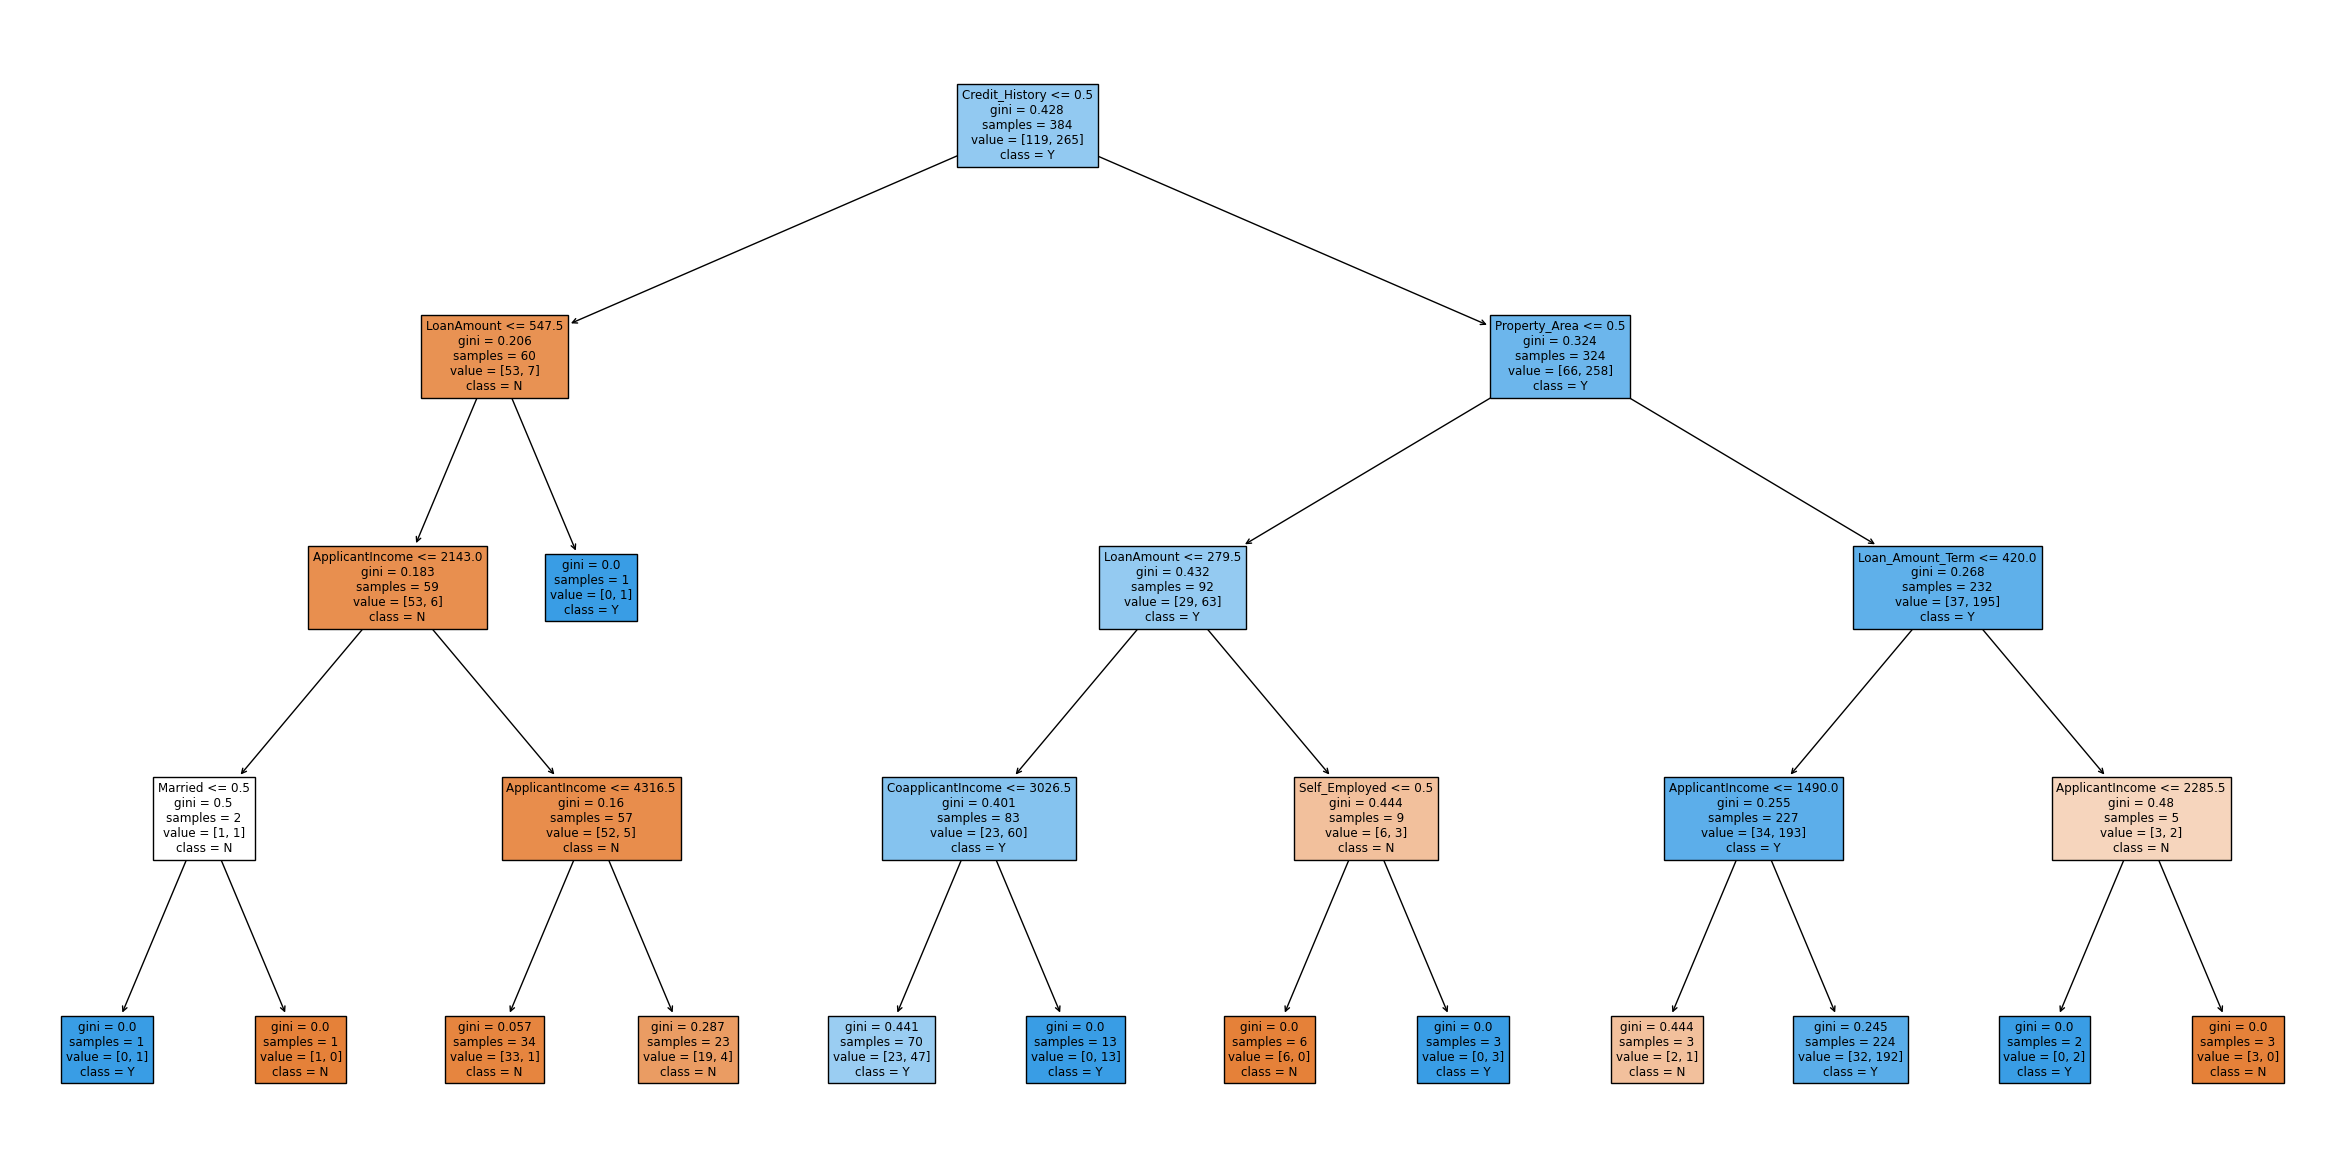

In [30]:
# Visualize the decision tree
plt.figure(figsize=(30, 15))
plot_tree(clf, feature_names=list(cm_X.columns), class_names=[str(i) for i in clf.classes_], filled=True)
plt.show()

In [31]:
# Make predictions
cm_y_pred = clf.predict(cm_X_test)

<Figure size 800x600 with 0 Axes>

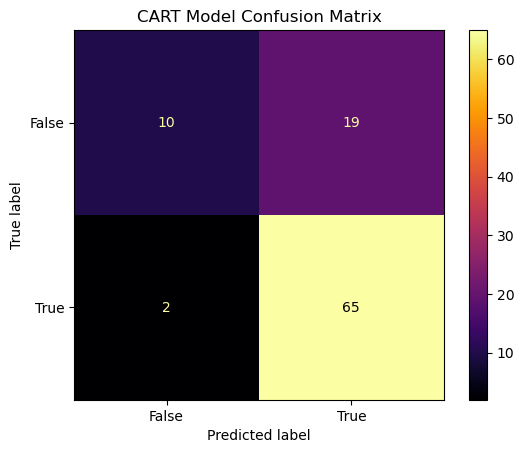

In [32]:
# Confusion Matrix
confusion_matrix = metrics.confusion_matrix(cm_y_test, cm_y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[False, True])

# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm_display.plot(cmap=plt.cm.inferno)
plt.title('CART Model Confusion Matrix')
plt.show()

In [33]:
# Evaluate the model
cm_accuracy = accuracy_score(cm_y_test, cm_y_pred)
class_report = classification_report(cm_y_test, cm_y_pred)

print("Accuracy:", cm_accuracy)
print("Classification Report:\n", class_report)

Accuracy: 0.78125
Classification Report:
               precision    recall  f1-score   support

           N       0.83      0.34      0.49        29
           Y       0.77      0.97      0.86        67

    accuracy                           0.78        96
   macro avg       0.80      0.66      0.67        96
weighted avg       0.79      0.78      0.75        96



### Random Forest

In [34]:
# Make a copy for the analysis
rftrain_df = train_df.copy()

In [35]:
# Convert categorical variables into numerical form
label_encoders = {}
for column in ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Property_Area', 'Self_Employed']:
    label_encoders[column] = LabelEncoder()
    rftrain_df[column] = label_encoders[column].fit_transform(rftrain_df[column])

In [36]:
# Assign features from your pre-split training and testing datasets
rf_X = rftrain_df.drop(columns=['Loan_ID','Loan_Status'])
rf_y = rftrain_df['Loan_Status']

# Split the dataset into training and testing sets
rf_X_train, rf_X_test, rf_y_train, rf_y_test = train_test_split(rf_X, rf_y, test_size=0.2, random_state=10)
print(rf_X_train.shape, rf_X_test.shape)

(384, 11) (96, 11)


In [37]:
# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=10)
rf_model.fit(rf_X_train, rf_y_train)

# Evaluate the model
rf_y_pred = rf_model.predict(rf_X_test)

<Figure size 800x600 with 0 Axes>

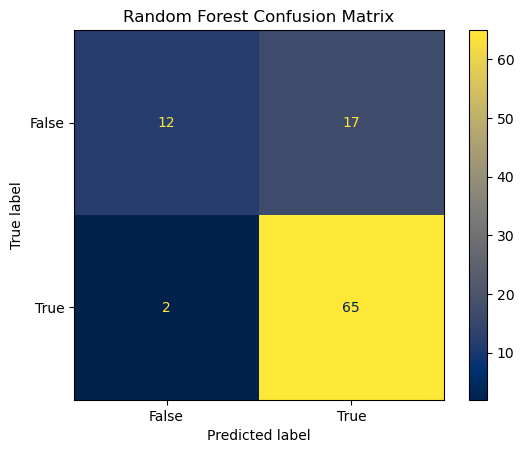

In [38]:
# Confusion Matrix
confusion_matrix = metrics.confusion_matrix(rf_y_test, rf_y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[False, True])

# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm_display.plot(cmap=plt.cm.cividis)
plt.title('Random Forest Confusion Matrix')
plt.show()

In [39]:
# Accuracy
rf_accuracy = accuracy_score(rf_y_test, rf_y_pred)
print("Accuracy:", rf_accuracy)

# Classification Report
print("Classification Report:")
print(classification_report(rf_y_test, rf_y_pred))

Accuracy: 0.8020833333333334
Classification Report:
              precision    recall  f1-score   support

           N       0.86      0.41      0.56        29
           Y       0.79      0.97      0.87        67

    accuracy                           0.80        96
   macro avg       0.82      0.69      0.72        96
weighted avg       0.81      0.80      0.78        96



### KNN

In [40]:
# Make a copy for the analysis
knntrain_df = train_df.copy()

In [41]:
# Reset index to start from 0
knntrain_df.reset_index(drop=True, inplace=True)

knntrain_df['Number'] = knntrain_df.index+1

In [42]:
trainData_knn, validData_knn = train_test_split(knntrain_df, test_size=0.2, random_state=10)
print(trainData_knn.shape, validData_knn.shape)

(384, 14) (96, 14)


In [43]:
# Convert categorical variables into numerical form
label_encoders_knn = {}
for column in ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Property_Area', 'Self_Employed']:
    label_encoders[column] = LabelEncoder()
    knntrain_df[column] = label_encoders[column].fit_transform(knntrain_df[column])

gender:
0 = female
1 = male

married:
0 = no
1 = yes

dependents:
0 = 0
1 = 1
2 = 2
3 = 3+

education:
0 = graduate
1 = not graduate

self employed:
0 = no
1 = yes

property area:
0 = rural
1 = semiurban
2 = urban

In [44]:
scaler = preprocessing.StandardScaler()
scaler.fit(knntrain_df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']])

df_norm_knn = pd.concat([
    pd.DataFrame(scaler.transform(knntrain_df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']]),
                 columns=['zApplicantIncome', 'zCoapplicantIncome', 'zLoanAmount', 'zLoan_Amount_Term']),
    knntrain_df[['Loan_ID', 'Gender', 'Married', 'Education', 'Self_Employed', 'Credit_History', 'Number', 'Loan_Status']]
], axis=1)

trainNorm = df_norm_knn.iloc[trainData_knn.index]
validNorm = df_norm_knn.iloc[validData_knn.index]

In [45]:
train_X = trainNorm[['zApplicantIncome', 'zCoapplicantIncome', 'zLoanAmount', 'zLoan_Amount_Term', 'Gender', 'Married', 'Education', 'Self_Employed', 'Credit_History']] 
train_y = trainNorm['Loan_Status']
valid_X = validNorm[['zApplicantIncome', 'zCoapplicantIncome', 'zLoanAmount', 'zLoan_Amount_Term', 'Gender', 'Married', 'Education', 'Self_Employed', 'Credit_History']]
valid_y = validNorm['Loan_Status']

In [46]:
results = []
knn_accuracy = {'k': None, 'accuracy': 0} 

for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k).fit(train_X, train_y)
    accuracy = accuracy_score(valid_y, knn.predict(valid_X))
    results.append({'k': k, 'accuracy': accuracy})
    
    # Storing the highest accuracy
    if accuracy > knn_accuracy['accuracy']:
        knn_accuracy['k'] = k
        knn_accuracy['accuracy'] = accuracy

results_df = pd.DataFrame(results)
print(results_df)

print("Highest Accuracy:", knn_accuracy['accuracy'])
print("Corresponding k value:", knn_accuracy['k'])

    k  accuracy
0   1  0.708333
1   2  0.687500
2   3  0.770833
3   4  0.760417
4   5  0.770833
5   6  0.770833
6   7  0.781250
7   8  0.791667
8   9  0.791667
9  10  0.781250
Highest Accuracy: 0.7916666666666666
Corresponding k value: 8


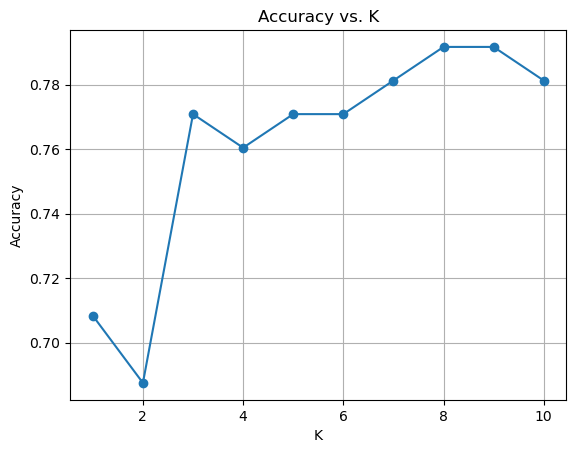

In [47]:
# Convert results list of dictionaries into a DataFrame
results_df = pd.DataFrame(results)

# Extract k and accuracy columns
k = results_df['k']
accuracy = results_df['accuracy']

# Plotting K vs. accuracy
plt.plot(k, accuracy, marker='o', linestyle='-')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. K')
plt.grid(True)
plt.show()

<Figure size 800x600 with 0 Axes>

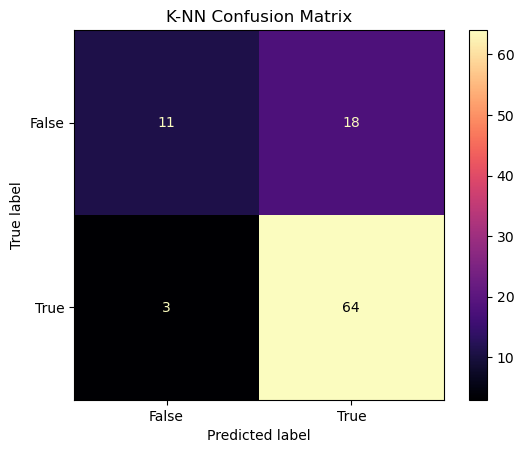

In [48]:
# Confusion Matrix
confusion_matrix = metrics.confusion_matrix(valid_y, knn.predict(valid_X))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[False, True])

# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm_display.plot(cmap=plt.cm.magma)
plt.title('K-NN Confusion Matrix')
plt.show()

## Model Comparison

In [49]:
print("Logistic Regression Accuracy:", round(lr_accuracy, 4))
print("Multinomial Naive Bayes Accuracy:", round(nb_accuracy, 4))
print("CART Accuracy:", round(cm_accuracy, 4))
print("Random Forest Accuracy:", round(rf_accuracy, 4))
print("KNN Accuracy:", round(knn_accuracy['accuracy'], 4))

Logistic Regression Accuracy: 0.8021
Multinomial Naive Bayes Accuracy: 0.5833
CART Accuracy: 0.7812
Random Forest Accuracy: 0.8021
KNN Accuracy: 0.7917


### Applying the best performing model to the test set

In [50]:
# Make a copy for the analysis
rftest_df = test_df.copy()

In [51]:
rftest_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
361,LP002969,Male,Yes,1,Graduate,No,2269,2167,99.0,360.0,1.0,Semiurban
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [52]:
# Convert categorical variables into numerical form
label_encoders = {}
for column in ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Property_Area', 'Self_Employed']:
    label_encoders[column] = LabelEncoder()
    rftest_df[column] = label_encoders[column].fit_transform(rftest_df[column])

In [53]:
# Create a dictionary mapping Loan_IDs to Loan_Status from the training set
loan_status_mapping = train_df.set_index('Loan_ID')['Loan_Status'].to_dict()

# Map Loan_Status from training set to test set based on Loan_ID
rftest_df['Loan_Status'] = rftest_df['Loan_ID'].map(loan_status_mapping)

rftest_df['Loan_Status'] = rftest_df['Loan_Status'].map({'Y': 1, 'N': 0})

In [54]:
# Drop 'Loan_ID' column from the test set
test_features = rftest_df.drop(['Loan_Status', 'Loan_ID'], axis=1)

# Predict using the trained Random Forest model
predict_test = rf_model.predict(test_features)
print(predict_test)

['Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'N'
 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'N' 'N' 'N' 'Y' 'Y' 'N' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y'
 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'N' 'Y' 'N' 'Y' 'N' 'N' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y'
 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'N' 'Y' 'N' 'Y'
 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N'
 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y

In [55]:
rftest_df['Predicted_Loan_Status'] = rf_model.predict(test_features)
rftest_df.drop(['Loan_Status'], axis=1, inplace=True)
rftest_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Predicted_Loan_Status
0,0,1,1,0,0,0,5720,0,110.0,360.0,1.0,2,Y
1,1,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2,Y
2,2,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2,Y
4,3,1,0,0,1,0,3276,0,78.0,360.0,1.0,2,Y
5,4,1,1,0,1,1,2165,3422,152.0,360.0,1.0,2,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,284,1,1,1,0,0,2269,2167,99.0,360.0,1.0,1,Y
362,285,1,1,3,1,1,4009,1777,113.0,360.0,1.0,2,Y
363,286,1,1,0,0,0,4158,709,115.0,360.0,1.0,2,Y
365,287,1,1,0,0,0,5000,2393,158.0,360.0,1.0,0,N
